# CRIMES IN TOP US CITIES & INSIGHTS FOR BETTER POLICING

## 1) Objective of the proposed research

Primary objective of this report is to provide executive officers of law enforcement agencies in the United States with a concise and data-driven analysis of crime trends in the top U.S. cities.

In this report, we will present key facts and trends related to crime, with a focus on actionable information. Our goal is to empower law enforcement leaders with knowledge that can assist them in making informed decisions to enhance public safety. By showcasing the most relevant and interesting findings about their respective cities, we aim to assist law enforcement agency to optimize their policing efforts more effectively.

Ultimately, the objective of this report is to initiate a dialogue with law enforcement agencies, fostering collaboration and partnerships that can lead to safer communities. We strive to demonstrate the value we can provide in assisting law enforcement agencies in their mission to prevent and reduce crime, ultimately saving lives and improving the quality of life for all residents in these cities across USA.

## 2) Data Exploration

In [98]:
#importing necessary libraries for data manipulation, numerical operations, plotting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [99]:
#Reading dataset and naming it as data
data = pd.read_csv('/report.csv')

#Displaying the first 5 rows of the dataset
data.head(5)

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


We checked the no of rows and columns of dataset to understand its dimensionality

In [100]:
data.shape

(2829, 15)

We then created a new column named 'total_crimes' by addiing columns (violent_crimes, homicides,rapes,assaults, robberies) together



In [101]:
data['total_crimes'] = data['violent_crimes'] + data['homicides'] + data['rapes'] + data['assaults'] + data['robberies']

#checking if the column is added in dataset
data.shape

(2829, 16)

We determined the number of missing values in each column of dataset using isna()

In [102]:
data.isna().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
total_crimes            76
dtype: int64

It is clear that out of 2829 rows, the maximum missing values in a column are 137 which is very small compared to dimensions of the dataset. Hence missing value treatment will not have any advserve effect on the data quality. Also there are no missing values in columns : report year, agency jurisdiction.

## Missing values treatment

We handled missing data by filling missing values differently based on the data type of each column. Missing values with the mode (most frequent value) for columns containing categorical data and with the median for columns containing numeric data.



In [103]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode().iloc[0])
    else:
        data[col] = data[col].fillna(data[col].median())


In [104]:
#Checking to confirm missing value treatment. 0 denotes there are no more missing values.
data.isna().sum()

report_year            0
agency_code            0
agency_jurisdiction    0
population             0
violent_crimes         0
homicides              0
rapes                  0
assaults               0
robberies              0
months_reported        0
crimes_percapita       0
homicides_percapita    0
rapes_percapita        0
assaults_percapita     0
robberies_percapita    0
total_crimes           0
dtype: int64

In [105]:
data.nunique()

report_year              41
agency_code              68
agency_jurisdiction      69
population             2741
violent_crimes         2527
homicides               521
rapes                   878
assaults               2280
robberies              2149
months_reported          12
crimes_percapita       2782
homicides_percapita    1872
rapes_percapita        2430
assaults_percapita     2723
robberies_percapita    2707
total_crimes           2485
dtype: int64



Since, no of unique values in columns agency_code = 68 & agency_jurisdiction = 69, it is clear that barring one instance, agency code and their jusridiction are unique and there is no overlapping of agencies for a particular jurisdiction.

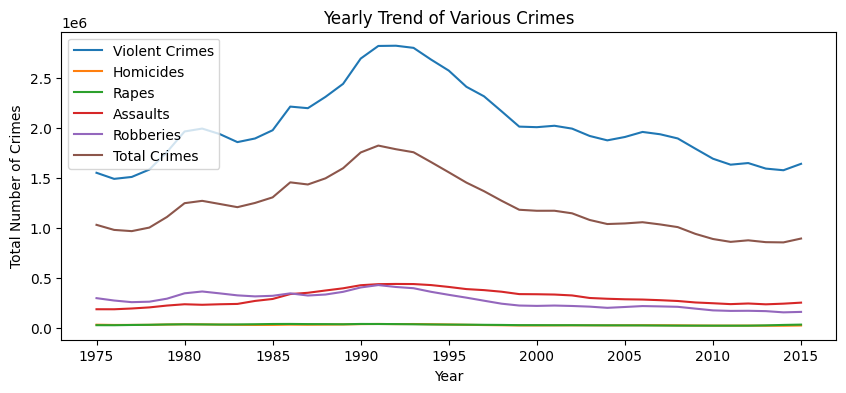

In [106]:

#let's group the data by 'report_year' and calculate the sum for crime type
yearly_sum = data.groupby('report_year')[['violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies', 'total_crimes']].sum()

import matplotlib.pyplot as plt


#create a line plot for the yearly trend of the selected columns
plt.figure(figsize=(10, 4))
plt.plot(yearly_sum.index, yearly_sum['violent_crimes'], label='Violent Crimes')
plt.plot(yearly_sum.index, yearly_sum['homicides'], label='Homicides')
plt.plot(yearly_sum.index, yearly_sum['rapes'], label='Rapes')
plt.plot(yearly_sum.index, yearly_sum['assaults'], label='Assaults')
plt.plot(yearly_sum.index, yearly_sum['robberies'], label='Robberies')
plt.plot(yearly_sum.index, yearly_sum['total_crimes'], label='Total Crimes')

#set plot labels and title
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.title('Yearly Trend of Various Crimes')
plt.legend()
plt.show()



It was observed that over the period of 40 years, reported crimes across catagories have seen a peak around early 1990s before decreasing till 2013-14. After which there seems to have slight uptick across all crimes in USA. This trend of crimes help in understanding overall movement and direction of crimes.

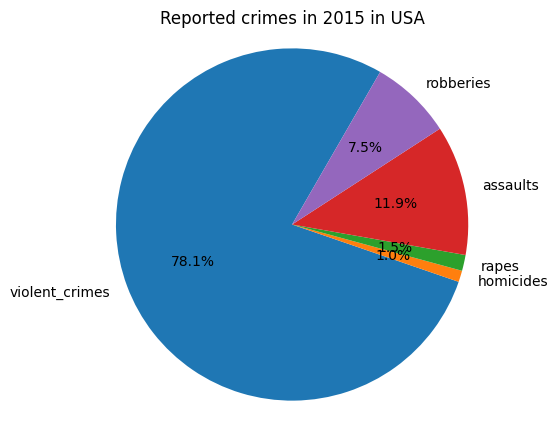

In [107]:
#filtering the data for 'report_year' = 2015
data_2015 = data[data['report_year'] == 2015]

#the sum of crime type columns for 2015 can be calculated as
sum_2015 = data_2015[['violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies']].sum()

#creating pie chart
plt.figure(figsize=(5, 5))
plt.pie(sum_2015, labels=sum_2015.index, autopct='%1.1f%%', startangle=60)
plt.title('Reported crimes in 2015 in USA')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

#show the pie chart
plt.show()

Violent crimes constitute 78% percent of total crimes reported in US in year 2015. The share of robberies and assults are closed to 10 percent followed by rapes and homicides which has around 1% share. This pie chart provides insight about proportion of various crimes in data.

# Feature selection

We selected the column **"population'** on the basis of following grounds :

1. By 2050 it is expected that almost 90 percent of the population will live in an urban setting', We will select column population & find out most populous cities/jurisdiction in USA.
2. Cities/densely populated urban areas offer unique set of advatages & challenges in policing. Since the geographic jurisdiction is comparatively smaller, it is easier to physically establish control over given area in given time. Whereas dense population may prove challenging in post crime investigations.
3. Both of the above factors make success in policing in cities instrumental for overall policing sucess.  

We therefore planned to consider topmost cities under this criteria (population) for further analysis. And limit our analysis to top 50 most populous jurisdiction taking base year as 2015 which is the latest year in the data.


In [108]:
#filter the data for 'report_year' = 2015
data_2015 = data[data['report_year'] == 2015]

#sort the filtered data by 'population' in decreasing order
sorted_data_2015 = data_2015.sort_values(by='population', ascending=False)

#creating a frame 'sorted_data_2015'sorted by 'population' in decreasing order for 2015
sorted_data_2015.head(10)
#creating a dataframe data2 with top 50 values of sorted_data_2015. data2 will be our reference data for further analysis
data2 = sorted_data_2015.head(50)
#checking no of rows of data2 to confirm
data2.shape

(50, 16)

In [109]:
#displaying first 10 rows of data2
data2.head(10)

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,total_crimes
2801,2015,NY03030,"New York City, NY",8550861.0,50088.0,352.0,2244.0,30546.0,16946.0,12.0,585.77,4.12,26.24,357.23,198.18,100176.0
2789,2015,CA01942,"Los Angeles, CA",3962726.0,25156.0,282.0,2209.0,13713.0,8952.0,12.0,634.82,7.12,55.74,346.05,225.91,50312.0
2770,2015,ILCPD00,"Chicago, IL",2728695.0,24663.0,478.0,1432.0,13104.0,9649.0,12.0,903.84,17.52,52.48,480.23,353.61,49326.0
2782,2015,TXHPD00,"Houston, TX",2275221.0,21994.0,303.0,986.0,10427.0,10278.0,12.0,966.68,13.32,43.34,458.29,451.74,43988.0
2807,2015,PAPEP00,"Philadelphia, PA",1567810.0,16132.0,280.0,1322.0,7765.0,6765.0,12.0,1028.95,17.86,84.32,495.28,431.49,32264.0
2786,2015,NV00201,"Las Vegas, NV",1562134.0,14383.0,127.0,1107.0,8139.0,5010.0,12.0,920.73,8.13,70.86,521.02,320.72,28766.0
2808,2015,AZ00723,"Phoenix, AZ",1559744.0,9261.0,112.0,1016.0,5113.0,3020.0,12.0,593.75,7.18,65.14,327.81,193.62,18522.0
2815,2015,TXSPD00,"San Antonio, TX",1463586.0,8594.0,94.0,1049.0,5465.0,1986.0,12.0,587.19,6.42,71.67,373.40,135.69,17188.0
2816,2015,CA03711,"San Diego, CA",1400467.0,5582.0,37.0,566.0,3601.0,1378.0,12.0,398.58,2.64,40.42,257.13,98.40,11164.0
2821,2015,NY05101,"Suffolk County, NY",1341453.0,1675.0,24.0,79.0,895.0,677.0,12.0,124.86,1.79,5.89,66.72,50.47,3350.0


## 4) Sort

We selected following 6 columns apart from population and agency jurisdiction to include for creating a new dataset.

**1. 'total_crimes':**  this column provides insights about total crimes for year 2015 for a particular city/jurisdiction

**2. 'crimes_per_capita':**  this column helps understanding crimes viz a viz population thereby providing the context

**3. 'violent_crimes':** As per FBI, violent crime is composed of four offenses: murder and nonnegligent manslaughter, rape, robbery, and aggravated assault. It provides the data about some serious violent offences

**4. 'robberies_per_capita':** Calculated by total robberies dividing by total population. This data was for year 2015.

**5. 'rapes_per_capita' :** Calculated by rape crimes per unit population for year 2015 in this context.

**6. 'homicides_per_capita' :** This column like above, gives us understanding about homicides rates in the unit population for given year.

Above columns helped in generating meaningful & contextual insights generated below about the crime statistics of top cities (population wise) of USA for year 2015.


In [110]:

#selecting the desired columns and creating a new dataframe as data3 to include selected columns only
columns_to_select = ['agency_jurisdiction', 'population', 'total_crimes','violent_crimes','crimes_percapita', 'robberies_percapita','rapes_percapita','homicides_percapita' ]
data3 = data2[columns_to_select]

# Sort 'data3' by the 'population' column in decreasing order
data3 = data3.sort_values(by='population', ascending=False)

#displaying newly created dataset with selected columns
data3.head(10)

,agency_jurisdiction,population,total_crimes,violent_crimes,crimes_percapita,robberies_percapita,rapes_percapita,homicides_percapita
2801,"New York City, NY",8550861.0,100176.0,50088.0,585.77,198.18,26.24,4.12
2789,"Los Angeles, CA",3962726.0,50312.0,25156.0,634.82,225.91,55.74,7.12
2770,"Chicago, IL",2728695.0,49326.0,24663.0,903.84,353.61,52.48,17.52
2782,"Houston, TX",2275221.0,43988.0,21994.0,966.68,451.74,43.34,13.32
2807,"Philadelphia, PA",1567810.0,32264.0,16132.0,1028.95,431.49,84.32,17.86
2786,"Las Vegas, NV",1562134.0,28766.0,14383.0,920.73,320.72,70.86,8.13
2808,"Phoenix, AZ",1559744.0,18522.0,9261.0,593.75,193.62,65.14,7.18
2815,"San Antonio, TX",1463586.0,17188.0,8594.0,587.19,135.69,71.67,6.42
2816,"San Diego, CA",1400467.0,11164.0,5582.0,398.58,98.40,40.42,2.64
2821,"Suffolk County, NY",1341453.0,3350.0,1675.0,124.86,50.47,5.89,1.79


As per above sorted data of population column for year 2015 following obersvations were made :   
1. city of New York tops the list in population as well as total crimes & violent crimes.
2. Philadelphia, PA ranks first in crimes per capita among top 10 most popluous cities followed by Houston, TX and Las Vegas coming closely second and third.
3. Suffolk County, NY has the lowest per capit crime rate and outlierly lowest per capita rape crime rate among these 10 cities.
4. Houston, TX has highest robberies per capita.
5. Chicago & Philadelphia lead per capita homicides rates.

## 5) Series

In [111]:
#Let's sort 'data3' by 'total_crimes' column in decreasing order
data3 = data3.sort_values(by='total_crimes', ascending=False)
#display only 'jurisdiction' and 'total_crimes' columns
data3[['agency_jurisdiction', 'population', 'total_crimes']].head(5)

,agency_jurisdiction,population,total_crimes
2801,"New York City, NY",8550861.0,100176.0
2789,"Los Angeles, CA",3962726.0,50312.0
2770,"Chicago, IL",2728695.0,49326.0
2782,"Houston, TX",2275221.0,43988.0
2807,"Philadelphia, PA",1567810.0,32264.0


Among the top 50 populous jurisdiction in USA, New York City, NY shows the highest no of total crimes for year 2015 followed by Los Angeles, Chicago, Houston. These observations are in line with the fact that these cities share the same rranking in population as well.

In [112]:
#sort 'data3' by 'crimes_percapita' column in decreasing order
data3 = data3.sort_values(by='crimes_percapita', ascending=False)
#display only 'jurisdiction' and 'crimes_percapita' columns
data3[['agency_jurisdiction', 'crimes_percapita']].head(5)

,agency_jurisdiction,crimes_percapita
2776,"Detroit, MI",1759.59
2791,"Memphis, TN",1740.14
2795,"Milwaukee, WI",1596.10
2766,"Baltimore, MD",1535.93
2785,"Kansas City, MO",1417.28


In [113]:
#Sort 'data3' by 'crimes_percapita' column in increasing order
data3 = data3.sort_values(by='crimes_percapita', ascending=True)
#display only 'jurisdiction' and 'crimes_percapita' columns
data3[['agency_jurisdiction', 'crimes_percapita']].head(5)

,agency_jurisdiction,crimes_percapita
2778,"Fairfax County, VA",88.41
2799,"Nassau County, NY",124.20
2821,"Suffolk County, NY",124.86
2825,"Virginia Beach, VA",138.25
2797,"Montgomery County, MD",194.61


Among the top 50 populous jurisdiction in USA for 2015, Detroit(MI) & Memphis(TN) have highest per capita crime rates. while Fairfax County (VA) shows lowest per capita crimes.

In [114]:
#Sort 'data3' by the 'robberies_percapita' column in decreasing order
data3 = data3.sort_values(by='robberies_percapita', ascending=False)
#display only 'jurisdiction' and 'robberies_percapita' columns
data3[['agency_jurisdiction', 'robberies_percapita']].head(5)

,agency_jurisdiction,robberies_percapita
2766,"Baltimore, MD",694.24
2795,"Milwaukee, WI",624.42
2776,"Detroit, MI",513.50
2826,"Washington, DC",506.38
2791,"Memphis, TN",475.88


In [115]:
#Sort 'data3' by the 'robberies_percapita' column in decreasing order
data3 = data3.sort_values(by='robberies_percapita', ascending=True)
#display only 'jurisdiction' and 'robberies_percapita' columns
data3[['agency_jurisdiction', 'robberies_percapita']].head(3)

,agency_jurisdiction,robberies_percapita
2778,"Fairfax County, VA",40.21
2821,"Suffolk County, NY",50.47
2799,"Nassau County, NY",52.30


Among the top 50 populous jurisdiction in USA for 2015, per capita robberies were highest in Baltimore MD followed by Milwaukee WI. While it was lowest in Fairfax County VA, Suffolk County NY & Nassau County NY.

In [116]:
#Sort 'data3' by the 'rapes_percapita' column in decreasing order
data3 = data3.sort_values(by='rapes_percapita', ascending=False)
#display only 'jurisdiction' and 'rapes_percapita' columns
data3[['agency_jurisdiction', 'rapes_percapita']].head(5)

,agency_jurisdiction,rapes_percapita
2773,"Columbus, OH",95.08
2807,"Philadelphia, PA",84.32
2791,"Memphis, TN",80.55
2775,"Denver, CO",80.30
2823,"Tucson, AZ",79.67


In [117]:
#Sort 'data3' by the 'rapes_percapita' column in decreasing order
data3 = data3.sort_values(by='rapes_percapita', ascending=True)
#display only 'jurisdiction' and 'rapes_percapita' columns
data3[['agency_jurisdiction', 'rapes_percapita']].head(5)

,agency_jurisdiction,rapes_percapita
2821,"Suffolk County, NY",5.89
2799,"Nassau County, NY",6.41
2778,"Fairfax County, VA",11.80
2819,"Seattle, WA",21.06
2813,"Sacramento, CA",21.44


Among the top 50 populous jurisdiction in USA for 2015, Columbus OH & Philadelphia have highest per capita rape crime rates. while they are lowest in Suffolk & Nassau county of NY.



In [118]:
#sort data3 by'homicides_percapita' column in decreasing order
data3 = data3.sort_values(by='homicides_percapita', ascending=False)
#display only 'jurisdiction' and 'homicides_percapita' columns
data3[['agency_jurisdiction', 'homicides_percapita']].head(5)

,agency_jurisdiction,homicides_percapita
2766,"Baltimore, MD",55.37
2776,"Detroit, MI",43.82
2795,"Milwaukee, WI",24.15
2826,"Washington, DC",24.10
2785,"Kansas City, MO",23.03


Baltimore, Detorit are the highest per capita homicides crime holder cities in USA among top 50 most populous cities for 2015

## 6) Plot

The plots were created to generate useful insights from the data as below :

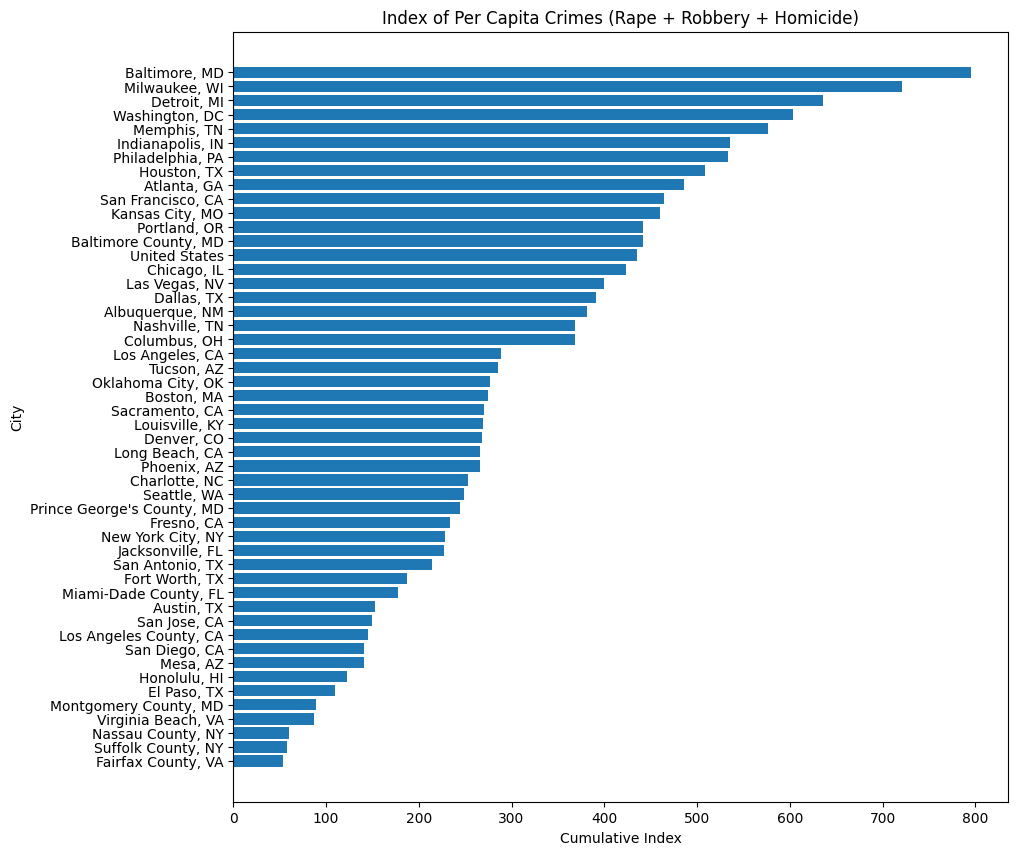

In [119]:

#calculating the cumulative index for each city based on specified columns
data3['cumulative_index'] = data3['rapes_percapita'] + data3['robberies_percapita'] + data3['homicides_percapita']
data3.sort_values(by='cumulative_index', ascending=False, inplace=True)

#creating a bar plot of the cumulative index
top_cities = data3[['agency_jurisdiction', 'cumulative_index']].head(50)
plt.figure(figsize=(10, 10))
plt.barh(top_cities['agency_jurisdiction'], top_cities['cumulative_index'])
plt.xlabel('Cumulative Index')
plt.ylabel('City')
plt.title('Index of Per Capita Crimes (Rape + Robbery + Homicide)')
plt.gca().invert_yaxis()
plt.show()


Horizontal bar plot represents an "Index of Per Capita Crimes" for the top 50 cities based on their cumulative index calculated from columns (Rape + Robbery + Homicide) per capita. It allowed us to compare and analyze the relative levels of these three types of crimes across different cities.

It can be seen that Baltimore, MD has highest score on this index. It means that it performs worst in preventing these crime as shown by highest per capita cumulative crimes score.
It is followed by Milwaukee, WI	which second highest score on this index.In addition to the above two cities, Detroit, MI, Washington, DC, Memphis TN are worst 5 performing cities in top 50 most populous cities in USA.

Whereas, Fairfox County of VA & Suffolk & Nassau county of NY lead by example with their lowest per capita cumulative crime index scores.






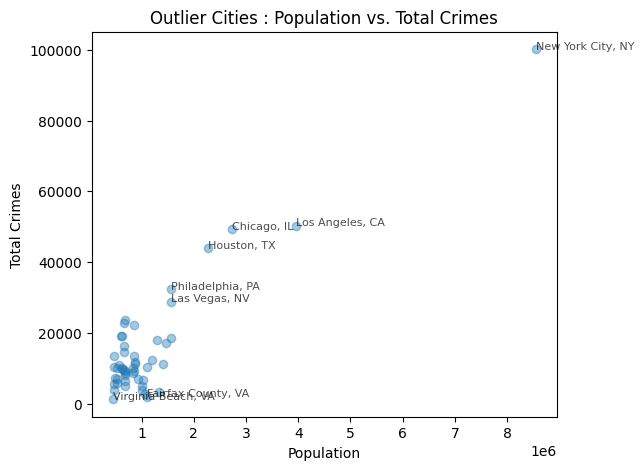

In [120]:

#Following plot was created with the help of generative AI

# Calculate the z-scores for 'population' and 'total_crimes'
z_scores_population = (data3['population'] - data3['population'].mean()) / data3['population'].std()
z_scores_total_crimes = (data3['total_crimes'] - data3['total_crimes'].mean()) / data3['total_crimes'].std()

# Define a z-score threshold to identify outliers
z_score_threshold =0.8

# Create a scatter plot to show the relationship between 'population' and 'total_crimes'
plt.figure(figsize=(6,5))
plt.scatter(data3['population'], data3['total_crimes'], alpha=0.4)
plt.title('Outlier Cities : Population vs. Total Crimes')
plt.xlabel('Population')
plt.ylabel('Total Crimes')

# Set the x-axis and y-axis scales to be linear
plt.xscale('linear')
plt.yscale('linear')

# Annotate the points with city names for cities with z-scores above the threshold
outlier_cities = data3[(np.abs(z_scores_population) > z_score_threshold) | (np.abs(z_scores_total_crimes) > z_score_threshold)]
for i, city in enumerate(outlier_cities['agency_jurisdiction']):
    plt.annotate(city, (outlier_cities['population'].iloc[i], outlier_cities['total_crimes'].iloc[i]), fontsize=8, alpha=0.7)

plt.show()


Some cities like New York, Los Angeles, Chicago, Houston, Philadelphia, Las Vegas are outliers in the sense that in comparison to other top cities in top 50, they have exceptionally higher crimes as well as higher population.

## 7) Summary

Following are the findings from our analysis :

**Trends in Reported Crimes Over 40 Years:**
- Crimes across categories peaked in the early 1990s, gradually decreasing around 2013-14.
- A slight uptick in crimes was observed across all categories in the USA after 2014.

**Proportion of Violent Crimes in 2015:**
- Violent crimes constituted 78% of total crimes in the USA in 2015.
- Robberies and assaults each accounted for approximately 10% of the total.
- Rapes and homicides had around a 1% share of the total crimes in 2015.

**Citywise Observations for 2015:**
- New York City had the highest population and the highest total and violent crimes.
- Philadelphia, PA had the highest crimes per capita among the top 10 most populous cities.
- Houston, TX, and Las Vegas followed closely in crimes per capita.
- Suffolk County, NY, had the lowest per capita crime rate and the lowest per capita rate for rapes among these 10 cities.
- Houston, TX, had the highest per capita robberies.
- Chicago and Philadelphia led in per capita homicide rates.

**Findings for the Top 50 Populous Jurisdictions in the USA for 2015:**
- New York City, NY, had the highest total crimes, followed by Los Angeles, Chicago, and Houston, reflecting their population rankings.
- Detroit, MI, and Memphis, TN, had the highest per capita crime rates, while Fairfax County, VA, had the lowest per capita crimes.

**Per Capita Robberies in the Top 50 Populous Jurisdictions for 2015:**
- Baltimore, MD, had the highest per capita robberies, followed by Milwaukee WI.
- Fairfax County, VA, Suffolk County, NY, and Nassau County, NY, had the lowest per capita robberies.

**Per Capita Rape Crime Rates in the Top 50 Populous Jurisdictions for 2015:**
- Columbus, OH, and Philadelphia had the highest per capita rape crime rates.
- Suffolk County, NY, and Nassau County, NY, had the lowest per capita rape crime rates.

**Index of Per Capita Crimes:**
- An "Index of Per Capita Crimes" based on the cumulative index from columns (Rape + Robbery + Homicide) per capita was used to compare cities.
- Baltimore, MD, had the highest score on this index, indicating the worst performance in preventing these crimes.
- Milwaukee, WI, had the second-highest score.
- Detroit, MI, Washington, DC, and Memphis, TN, were among the worst-performing cities in preventing these crimes among the top 50 most populous cities in the USA.
- Fairfax County, VA, Suffolk County, NY, and Nassau County, NY, had the lowest per capita cumulative crime index scores.

**Outliers**

- Some cities like New York, Los Angeles, Chicago, Houston, Philadelphia, Las Vegas are outliers as they have exceptionally higher crimes as well as higher population.

## 8) Recommendations

- **Prioritize Addressing Violent Crimes:** We recommend prioritizing the allocation of resources and strategies to focus on preventing and reducing violent crimes, as they constitute a significant proportion of total crimes (78% in 2015).

- **Special Focus on High-Crime Cities:** For cities like New York City, Philadelphia, Houston, and others with high crime rates, we recommend implementing proactive measures to address crimes per capita and formulate strategies tailored to the unique challenges of these areas.

- **Best Practices:** We recommend learning from top-performing regions like Suffolk County, NY, and Fairfax County, VA, which exhibit lower crime rates. Analyze their successful approaches and implement similar practices where applicable.

- **Strengthen Robbery Prevention:** For cities with high per capita robbery rates, such as Houston, TX, we recommend focusing on improving strategies for robbery prevention by studying best practices from lower-incident areas like Fairfax County, VA.

- **Homicide Reduction Strategies:** For cities with high per capita homicide rates, like Chicago and Philadelphia, we recommend implementing targeted initiatives to increase community safety.

- **Collaborative Efforts:** We recommend to have collaboration and partnerships with law enforcement agencies across the nation. Sharing best practices and insights can lead to more effective crime prevention strategies and ultimately safer communities.

- **"Index of Per Capita Crimes":** We recommend greater use of the "Index of Per Capita Crimes" to assess the overall performance in preventing crimes. Areas, such as Baltimore, MD, Milwaukee, WI, Detroit, MI, Washington, DC, and Memphis, TN, where improvement is needed in policing.

- **Special Attention towards outlier cities:** Special attention should be given towards some cities like New York, Los Angeles, Chicago, Houston, Philadelphia, Las Vegas since they exceed by huge margin in population and crime among the peers.

- **Future View:** With nearly 90% of the population expected to reside in urban settings by 2050, success in urban policing is pivotal for overall law enforcement effectiveness.

- **Harness Geographic Advantage:** We need to acknowledge that urban settings allow for relatively smaller geographic jurisdictions, making it more feasible to establish control over specific areas promptly. However, the dense population can pose challenges in post-crime investigations.

- **Collaborative Data Integration:** If we can combine the dataset with one containing city-wise data on law enforcement officer numbers it can provide deeper insights for better policing strategies.

- **Data Up-to-Date and Relevant:** While the current dataset covers up to the year 2015, we can offer better insights with the latest data.

- **Urban Challenges and Soft Targets:** Urban areas, being hubs of economic activity and cultural events, can attract large crowds and become soft targets for criminals. The multiplicity of challenges in urban policing, require a proactive and preventive approach.

- **Technological Assistance for Preventive Policing:** Technological assistance is imperative in Preventive policing in the urban landscape.  Data-driven analysis provided by Optimax Inc, can therfore play a vital role in enhancing preventive measures and improving public safety.

- **Emphasize Data-Driven Strategies:** We finally recommend to  utilize data analysis to identify and target specific trends in reported crimes. Given the observed trends, a data-driven approach is crucial to making informed decisions and optimizing policing efforts.

These recommendations aim to help law enforcement agencies optimize their policing efforts, reduce crime, and save lives. By leveraging data and focusing on areas of concern, we can work together towards achieving safer communities across USA.


## 9) References

1. Urbanization in the United States 1790 to 2050
Published by
Aaron O'Neill
, Nov 10, 2022(https://www.statista.com/statistics/269967/urbanization-in-the-united-states/)

2. Ratio of law enforcement officer to people in USA (https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/topic-pages/police-employee-data#:~:text=Nationwide%2C%20the%20rate%20of%20sworn,(Based%20on%20Table%2074.))

3. definition of violent crime (https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/topic-pages/violent-crime)

4. 'Outlier Cities : Population vs. Total Crimes' plot was created with the help of chatgpt